In [68]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')
import platform
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 환경에서는 'Malgun Gothic' 폰트를 사용
else:
    plt.rcParams['font.family'] = 'AppleGothic'  # macOS나 Linux 등 다른 환경에서는 'AppleGothic' 폰트를 사용

matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
# # 폰트 설정 
# matplotlib.rc("font",family = "NanumGothic")
# matplotlib.rc("axes",unicode_minus = False)

In [61]:
matplotlib.rc('font', family='AppleGothic')
plt.rc('font', family='AppleGothic')

# 데이터 불러오기

## 고객 정보 데이터

- (Row : 11,555 / Column : 8) | 파일명 : member_data.csv

| 변수명             | 타입   | 상세내용                                                 |
| ------------------ | ------ | -------------------------------------------------------- |
| 회원번호           | ID     | 회원 고유 식별 번호                                      |
| 조합원상태         | 범주형 | 회원 가입 상태(탈퇴여부)                                 |
| 주소               | 범주형 | 회원 주소지                                              |
| 성별               | 범주형 | 회원성별                                                 |
| 연령               | 연속형 | 회원 연령                                                |
| 배송서비스신청여부 | 범주형 | 매장에서 물품 구매 시 집까지 배송서비스 신청 여부        |
| 모바일알람신청여부 | 범주형 | 프로모션 및 할인 관련, 마케팅 관련 메시지 알람 수신 여부 |
| Gold_member        | 범주형 | VIP 고객 여부                                            |

## 고객 정보 데이터 파생 변수

| 변수명   | 타입   | 상세내용                                                                    |
| -------- | ------ | --------------------------------------------------------------------------- |
| 연령대   | 범주형 | ['19세 이하', '20대', '30대', '40대', '50대', '60대', '70대 이상']으로 분류 |
| 연령층   | 범주형 | ['청년층', '중년층', '장년층', '노년층']으로 분류                           |
| 주소\_구 | 범주형 | 주소 데이터에서 \*\* 구 만 추출                                             |
| 주소\_동 | 범주형 | 주소 데이터에서 \*\* 동 만 추출                                             |
| VIP | 범주형 | RFM을 기준으로 VIP지표 4등급으로 재생성 {} | 

## 판매 정보 데이터

- (Row : 123,191 / Column : 12) | 파일명 product_data_001.csv

- (Row : 55,108 / Column : 12) | 파일명 product_data_002.csv

- (Row : 63,776 / Column : 12) | 파일명 product_data_003.csv

- (Row : 52,570 / Column : 12) | 파일명 product_data_004.csv

| 변수명           | 타입     | 상세내용                                    |
| ---------------- | -------- | ------------------------------------------- |
| 공급일자         | datetime | 상품 판매 일자                              |
| 회원번호         | ID       | 회원 고유 식별 ID                           |
| 조합원상태       | 범주형   | 회원 가입 상태(탈퇴여부)                    |
| 물품대분류       | 범주형   | 구매 제품의 물품 대분류                     |
| 물품중분류       | 범주형   | 구매 제품의 물품 중분류                     |
| 물품소분류       | 범주형   | 구매 제품의 물품 소분류                     |
| 물품명           | 범주형   | 구매 제품의 물품명                          |
| 구매수량         | 연속형   | 고객이 구매한 물품 수량                     |
| 구매금액         | 연속형   | 고객이 구매한 물품 금액( 원단위)            |
| 구매매장         | 범주형   | 구매 매장                                   |
| 반품\_원거래일자 | datetime | 고객이 품목을 반품한 경우, 반품 날짜 (환불) |
| 구매시각         | time     | 구매시각 (바코드에 상품이 찍힌 시간)        |

## 판매 정보 데이터 파생 변수

| 변수명     | 타입   | 상세내용                                                                                                |
| ---------- | ------ | ------------------------------------------------------------------------------------------------------- |
| weekday    | 범주형 | 공급날짜를 기준으로 평일(월-금) 과 주말로 범주화                                                        |
| 구매시간대 | 범주형 | 구매시각에서 분을 제거한 시만 남긴 데이터                                                               |
| 판매시간대 | 범주형 | 구매시각을 기준으로 [아침(8:00 -10:59 ),점심(11:00-13:59),오후(14:00 - 17:59) ,저녁(18:00-21:00)]범주화 |
| 행사품목 | 불린형 | 행사품목인지 아닌지를 기준으로 True , False  | 
| 증정품여부 | 불린형 | 증정품을 준 상품인지 아닌지를 기준으로 True, False |
| 유기농제품 | 불린형 | 유기농(친환경) 제품인지 아닌지를 기준으로 True, False |


# 데이터 불러오기

- info, describe 확인
- concat -> product, member 

In [5]:
import os
os.chdir(r"C:\Users\zlddp\OneDrive\바탕 화면\A3_대형마트") #current directory 지정
os.getcwd()

'C:\\Users\\zlddp\\OneDrive\\바탕 화면\\A3_대형마트'

In [6]:
member = pd.read_csv("member_data.csv")
print(member.shape)
member

(11555, 8)


,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal
...,...,...,...,...,...,...,...,...
11550,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal
11551,999721408,정상회원,수지구-동천동,여,43.0,미신청,.,normal
11552,999738112,정상회원,수지구-성복동,여,67.0,미신청,.,normal
11553,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal


In [7]:
product1 = pd.read_csv("product_data_001.csv")
product2 = pd.read_csv("product_data_002.csv")
product3 = pd.read_csv("product_data_003.csv")
product4 = pd.read_csv("product_data_004.csv")
print(product1.shape, product2.shape, product3.shape, product4.shape)

(123191, 12) (55108, 12) (63776, 12) (52570, 12)


In [8]:
# 매장 A,B,C,D 모두 합친 데이터
product = pd.concat([product1, product2, product3,
                    product4], ignore_index=True)
product

,공급일자_,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
0,2021-01-01,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207,매장C,NaN,10:04
1,2021-01-01,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403,매장C,NaN,10:09
2,2021-01-01,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083,매장C,NaN,10:12
3,2021-01-01,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849,매장C,NaN,10:23
4,2021-01-01,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507,매장C,NaN,10:29
...,...,...,...,...,...,...,...,...,...,...,...,...
294640,2021-10-30,1110819712,정상회원,채소,뿌리채소,무,무(0.7~1kg미만),1.0,2680,매장A,NaN,13:26
294641,2021-10-30,1517953728,정상회원,채소,양념채소,쪽파,쪽파(500g),1.0,4212,매장A,NaN,10:58
294642,2021-10-30,713691392,정상회원,반찬,밑반찬,조림,우엉조림(반찬용/150g),1.0,7658,매장A,NaN,14:36
294643,2021-10-30,247926336,정상회원,간식,빵,건강곡물빵,감자바게트(180g)/매장,1.0,5169,매장A,NaN,16:23



# 전처리

- 성별, 나이 결측치 처리

- 반품\_원거래일자

  1. nan인데 수량이 음수로 체크되어 있는 경우, nan값을 공급일자로 변경하여 결측치 처리 (부분취소라고 판단하였음)
  2. 2021년 1월 1일부터 공급일자가 시작되는 데이터인데 2020년으로 처리되어 있는 경우에는 이상치로 판단하여 삭제

- 연령 -> 연령대 별로 범주화

  1. 연령대 = ['19세 이하', '20대', '30대', '40대', '50대', '60대', '70대 이상']
  2. 연령층 = ['청년층', '중년층', '장년층', '노년층']~~

- 주소 -> 구/ 동 별로 데이터 범주화

- 공급일자 -> 평일/주말 유입인구로 범주화

- 구매시각 -> 시간대별로 나눠서 시간별 유입인구 파악

- rfm -> rfm을 기준으로 새로운 vip지표 생성

- 행사품목 -> 행사품목인지 아닌지 여부를 파악하는 파생변수 생성

- 증정품여부 -> 증정품을 증정한 상품인지 아닌지 여부를 파악하는 파생변수 생성 

- 유기농여부 -> 유기농 제품인지 아닌지 여부 파악하는 파생변수 생성 

# Member data 

## 성별 전처리


In [9]:
# 결측치 파악
member['성별'].isnull().sum()

2

In [10]:
member.dropna(subset='성별', inplace=True)

In [11]:
member.shape

(11553, 8)

## 연령 전처리


In [12]:
# 결측치 파악
member['연령'].isnull().sum()

1

In [13]:
# 결측치 행 두개 제거
member.dropna(subset="연령", inplace=True)

# 결측치 제거 됐는지 파악
member.shape

(11552, 8)

In [14]:
# 연령대 구분 기준 설정
bins = [0, 20, 30, 40, 50, 60, 70, 109]
labels = ['19세 이하', '20대', '30대', '40대', '50대', '60대', '70대 이상']

# '연령대' 열 추가
member['연령대'] = pd.cut(member['연령'], bins=bins, labels=labels, right=False)

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

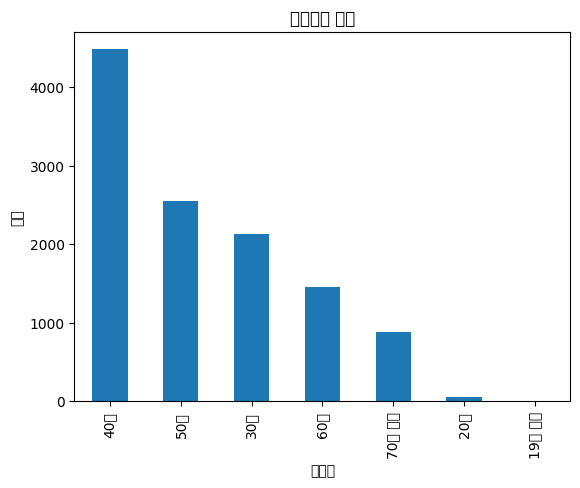

In [15]:
# 연령대별 분포를 나타내는 막대 그래프
member['연령대'].value_counts().plot(kind='bar')

# 그래프 제목과 축 제목 설정
plt.title('연령대별 분포')
plt.xlabel('연령대')
plt.ylabel('개수')

# 그래프 출력
plt.show()

In [16]:
bins = [0, 30, 50, 65, 109]
labels = ['청년층', '중년층', '장년층', '노년층']

# '연령층' 열 추가
member['연령층'] = pd.cut(member['연령'], bins=bins, labels=labels, right=False)

# 결과 확인
member[:100]

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,연령층
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,50대,장년층
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,30대,중년층
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,30대,중년층
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal,70대 이상,노년층
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,40대,중년층
...,...,...,...,...,...,...,...,...,...,...
95,1008719296,정상회원,수원 영통구-기타,여,44.0,미신청,.,normal,40대,중년층
96,1008748992,정상회원,수지구-동천동,여,52.0,미신청,.,normal,50대,장년층
97,1008800960,정상회원,수지구-동천동,여,49.0,미신청,.,normal,40대,중년층
98,1008955008,정상회원,수지구-성복동,여,42.0,신청,.,normal,40대,중년층


findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

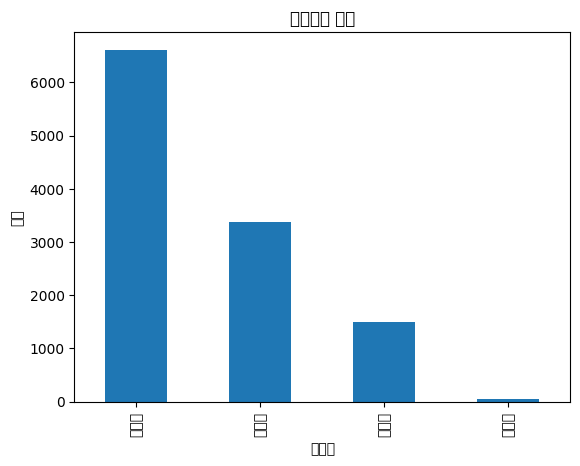

In [17]:
# 연령층별 분포를 나타내는 막대 그래프
member['연령층'].value_counts().plot(kind='bar')

# 그래프 제목과 축 제목 설정
plt.title('연령대별 분포')
plt.xlabel('연령대')
plt.ylabel('개수')

# 그래프 출력
plt.show()

## 주소 전처리

주소를 구/동 별로 데이터 범주화


In [18]:
member['주소_구'] = member['주소'].astype(str).str.split('-').str[0]
member['주소_동'] = member['주소'].astype(str).str.split('-').str[1]

In [19]:
# 이상치 처리
member.loc[member['주소'] == '기타-동천동', '주소_구'] = '수지구'
member.loc[member['주소'] == '기타-궁내동', '주소_구'] = '분당구'
member.loc[member['주소'] == '기타-금곡동', '주소_구'] = '수원 권선구'
member.loc[member['주소'] == '기타-금광동', '주소_구'] = '중원구'
member.loc[member['주소'] == '기타-동백동', '주소_구'] = '기흥구'
member.loc[member['주소'] == '기타-보라동', '주소_구'] = '기흥구'
member.loc[member['주소'] == '기타-성남동', '주소_구'] = '중원구'
member.loc[member['주소'] == '기타-신흥동', '주소_구'] = '수정구'
member.loc[member['주소'] == '기타-율동', '주소_구'] = '분당구'
member.loc[member['주소'] == '기타-은행동', '주소_구'] = '중원구'
member.loc[member['주소'] == '기타-중앙동', '주소_구'] = '중원구'
member.loc[member['주소'] == '기타-태평동', '주소_구'] = '수정구'
member.loc[member['주소'] == '기타-비조합원', '주소_동'] = '기타'

In [20]:
member[member['주소_구'] == '기타']['주소_동'].value_counts()

주소_동
기타    1124
Name: count, dtype: int64

In [21]:
member = member.drop('주소', axis=1)
member.head()

,회원번호,조합원상태,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,연령층,주소_구,주소_동
0,1000012800,정상회원,여,58.0,미신청,.,normal,50대,장년층,수지구,풍덕천동
1,1000103744,정상회원,여,34.0,미신청,.,normal,30대,중년층,처인구,고림동
2,1000122304,정상회원,여,38.0,미신청,.,normal,30대,중년층,광주,기타
3,1000163136,정상회원,여,73.0,미신청,.,normal,70대 이상,노년층,수지구,동천동
4,1000281920,정상회원,여,42.0,신청,.,normal,40대,중년층,수지구,풍덕천동


In [22]:
member['주소_구'].value_counts()

주소_구
수지구       8199
기타        1124
기흥구        702
분당구        672
수원 영통구     216
서울 강남구     173
서울 송파구      95
화성          78
처인구         74
광주          73
중원구         34
수원 장안구      30
수정구         26
수원 팔달구      23
수원 권선구      19
하남          14
Name: count, dtype: int64

In [23]:
suzi = member[member['주소_구'] == '수지구']
notsuzi = member[member['주소_구'] != '수지구']

In [24]:
member.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11552 entries, 0 to 11554
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   회원번호         11552 non-null  int64   
 1   조합원상태        11552 non-null  object  
 2   성별           11552 non-null  object  
 3   연령           11552 non-null  float64 
 4   배송서비스신청여부    11552 non-null  object  
 5   모바일알람여부      11552 non-null  object  
 6   Gold_member  11552 non-null  object  
 7   연령대          11552 non-null  category
 8   연령층          11552 non-null  category
 9   주소_구         11552 non-null  object  
 10  주소_동         11552 non-null  object  
dtypes: category(2), float64(1), int64(1), object(7)
memory usage: 925.6+ KB


# Product data 

## 공급일자

weekday = 공급일자를 평일/주말로 범주화

평일중에서도 {월,화,수,목,금}으로 범주화


In [25]:
product['공급일자_'] = pd.to_datetime(product['공급일자_'])
product['weekday'] = ''
day = {0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}
for i in range(len(product)):
    product.at[i, 'weekday'] = day[product.at[i, '공급일자_'].weekday()]

product['weekday'].value_counts()

weekday
목    52948
금    44924
월    44777
일    43711
토    42823
화    42350
수    23112
Name: count, dtype: int64

In [26]:
product.groupby('weekday')['구매금액'].sum()

weekday
금    491190414
목    582803486
수    253977114
월    495985578
일    477440487
토    478087960
화    475671384
Name: 구매금액, dtype: int64

<Axes: xlabel='weekday', ylabel='count'>

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

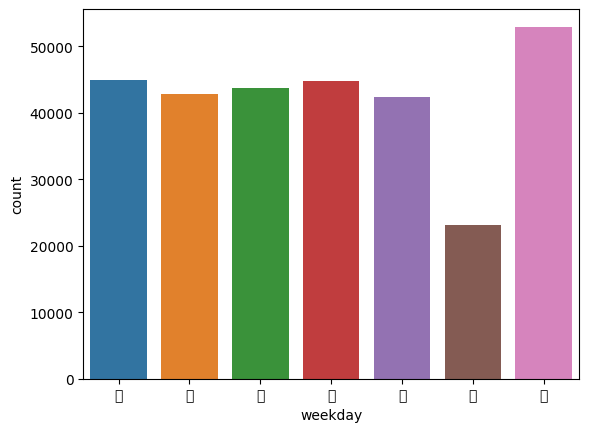

In [27]:
sns.countplot(x='weekday', data=product)

In [28]:
product[product['weekday'] == '일']['구매시각'].min()
# 토/일은 마지막 계산 시간 20시 20분쯤

'08:20'

## 구매시각 전처리

구매시간대 = 구매시각에서 분을 제거한 시만 남긴 데이터

판매시간대 = ['아침', '점심','오후','저녁']


In [29]:
product['구매시간대'] = product['구매시각'].astype(str).str.split(':').str[0]
product['구매시간대'].head()

0    10
1    10
2    10
3    10
4    10
Name: 구매시간대, dtype: object

In [30]:
# 시간대별 구매횟수 체크
product['구매시간대'].value_counts()

구매시간대
10    41105
11    33431
16    33338
15    30566
12    30305
13    29017
17    28877
14    27620
18    22552
19    16714
20      851
09      258
08       11
Name: count, dtype: int64

In [31]:
# 시간대별 횟수 비율
product['구매시간대'].value_counts(normalize=True).round(3)

구매시간대
10    0.140
11    0.113
16    0.113
15    0.104
12    0.103
13    0.098
17    0.098
14    0.094
18    0.077
19    0.057
20    0.003
09    0.001
08    0.000
Name: proportion, dtype: float64

In [32]:
# 구매 시각을 시간대로 분류하여 새로운 열에 저장
for index, row in product.iterrows():
    purchase_time = datetime.strptime(row['구매시각'], '%H:%M')
    if purchase_time.time() >= datetime.strptime('08:00', '%H:%M').time() and purchase_time.time() <= datetime.strptime('10:59', '%H:%M').time():
        product.at[index, '판매시간대'] = '아침'
    elif purchase_time.time() >= datetime.strptime('11:00', '%H:%M').time() and purchase_time.time() <= datetime.strptime('13:59', '%H:%M').time():
        product.at[index, '판매시간대'] = '점심'
    elif purchase_time.time() >= datetime.strptime('14:00', '%H:%M').time() and purchase_time.time() <= datetime.strptime('17:59', '%H:%M').time():
        product.at[index, '판매시간대'] = '오후'
    elif purchase_time.time() >= datetime.strptime('18:00', '%H:%M').time() and purchase_time.time() <= datetime.strptime('21:00', '%H:%M').time():
        product.at[index, '판매시간대'] = '저녁'

In [33]:
# 시간대별 구매수량 계산, 파생변수 '판매시간대' 생성
morning_sales = product.loc[product['판매시간대'] == '아침', '구매수량'].sum()
lunch_sales = product.loc[product['판매시간대'] == '점심', '구매수량'].sum()
afternoon_sales = product.loc[product['판매시간대'] == '오후', '구매수량'].sum()
evening_sales = product.loc[product['판매시간대'] == '저녁', '구매수량'].sum()



# 시간대별 구매금액 계산
morning_revenue = product.loc[product['판매시간대'] == '아침', '구매금액'].sum()
lunch_revenue = product.loc[product['판매시간대'] == '점심', '구매금액'].sum()
afternoon_revenue = product.loc[product['판매시간대'] == '오후', '구매금액'].sum()
evening_revenue = product.loc[product['판매시간대'] == '저녁', '구매금액'].sum()



In [34]:
# 시간별로 구매 시각 분류
# 운영 시간인 오전 8시부터 오후 9시까지의 시간 레이블
time_labels = [str(hour).zfill(2) + ":00" for hour in range(8, 22)]
purchase_counts = [0] * len(time_labels)  # 구매 수량
purchase_amounts = [0] * len(time_labels)  # 판매 금액

for index, row in product.iterrows():
    purchase_time = datetime.strptime(row['구매시각'], '%H:%M')  # 시각 형식으로 변환
    hour = purchase_time.time().hour
    if hour >= 8 and hour <= 21:
        index = hour - 8
        purchase_counts[index] += row['구매수량']
        purchase_amounts[index] += row['구매금액']



## 결측치 처리

- 공급일자가 2021년1월 1일부터 시작하는 데이터인데, 반품 원거래 일자가 2020년으로 쓰여있는 값들은 이상치라고 생각하여 제거함.

9개의 데이터 삭제


In [35]:
product = product[~product['반품_원거래일자'].astype(str).str.contains('2020')]

# Reset the index of the dataframe
product.reset_index(drop=True, inplace=True)

# Display the updated dataframe
# product

In [36]:
# # '반품_원거래일자'가 결측값이고 '구매수량'이 양수인 데이터만 선택 (구매수량이 음수면 반품)
# product = product[(product['반품_원거래일자'].isna()) & (product['구매수량'] > 0)]

## 행사품목인지 아닌지 여부를 파악하는 파생변수 생성 

In [37]:
pattern = r'프로모션|쿠폰북행사'
pattern1 =  r'증정|증정품|샘플'
product['행사품목'] = product['물품명'].str.contains(pattern, regex=True)
product['증정품여부'] = product['물품명'].str.contains(pattern, regex=True)


# 유기농 물품인지 아닌지 여부 파생변수 생성 

In [38]:
pattern = r'/유|유기|유기농|무농약|논지엠오|무항생제'
product['유기농물품'] = product['물품명'].str.contains(pattern, regex=True)

In [39]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294636 entries, 0 to 294635
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   공급일자_     294636 non-null  datetime64[ns]
 1   회원번호      294636 non-null  int64         
 2   조합원상태     294636 non-null  object        
 3   물품대분류     294636 non-null  object        
 4   물품중분류     294636 non-null  object        
 5   물품소분류     294636 non-null  object        
 6   물품명       294636 non-null  object        
 7   구매수량      294636 non-null  float64       
 8   구매금액      294636 non-null  int64         
 9   구매매장      294636 non-null  object        
 10  반품_원거래일자  4951 non-null    float64       
 11  구매시각      294636 non-null  object        
 12  weekday   294636 non-null  object        
 13  구매시간대     294636 non-null  object        
 14  판매시간대     294636 non-null  object        
 15  행사품목      294636 non-null  bool          
 16  증정품여부     294636 non-null  bool       

In [40]:
product #유기농물품이 True이면 유기농물품이다.

,공급일자_,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,weekday,구매시간대,판매시간대,행사품목,증정품여부,유기농물품
0,2021-01-01,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207,매장C,NaN,10:04,금,10,아침,False,False,True
1,2021-01-01,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403,매장C,NaN,10:09,금,10,아침,False,False,False
2,2021-01-01,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083,매장C,NaN,10:12,금,10,아침,False,False,False
3,2021-01-01,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849,매장C,NaN,10:23,금,10,아침,False,False,True
4,2021-01-01,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507,매장C,NaN,10:29,금,10,아침,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294631,2021-10-30,1110819712,정상회원,채소,뿌리채소,무,무(0.7~1kg미만),1.0,2680,매장A,NaN,13:26,토,13,점심,False,False,False
294632,2021-10-30,1517953728,정상회원,채소,양념채소,쪽파,쪽파(500g),1.0,4212,매장A,NaN,10:58,토,10,아침,False,False,False
294633,2021-10-30,713691392,정상회원,반찬,밑반찬,조림,우엉조림(반찬용/150g),1.0,7658,매장A,NaN,14:36,토,14,오후,False,False,False
294634,2021-10-30,247926336,정상회원,간식,빵,건강곡물빵,감자바게트(180g)/매장,1.0,5169,매장A,NaN,16:23,토,16,오후,False,False,False


In [41]:
product.to_csv('organic_data.csv', index=False)

## RFM을 기준으로 만든 VIP 파생변수 

* 기존의 VIP는 2개로 나뉘어져 있었지만, RFM을 기준으로 총 4개의 등급으로 재평가한 파생변수 


In [69]:
#3분기 New membership 데이터 불러오기
final_member_3 = pd.read_csv("final_member_3.csv")
final_member_3

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,Bronze
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,Silver
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,Silver
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal,Silver
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,Gold
...,...,...,...,...,...,...,...,...,...
11512,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal,Bronze
11513,999721408,정상회원,수지구-동천동,여,43.0,미신청,.,normal,Bronze
11514,999738112,정상회원,수지구-성복동,여,67.0,미신청,.,normal,Silver
11515,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,Gold


In [70]:
final_member = pd.merge(member, final_member_3[['회원번호', 'membership']], on='회원번호', how='left')
final_member

,회원번호,조합원상태,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,연령층,주소_구,주소_동,membership
0,1000012800,정상회원,여,58.0,미신청,.,normal,50대,장년층,수지구,풍덕천동,Bronze
1,1000103744,정상회원,여,34.0,미신청,.,normal,30대,중년층,처인구,고림동,Silver
2,1000122304,정상회원,여,38.0,미신청,.,normal,30대,중년층,광주,기타,Silver
3,1000163136,정상회원,여,73.0,미신청,.,normal,70대 이상,노년층,수지구,동천동,Silver
4,1000281920,정상회원,여,42.0,신청,.,normal,40대,중년층,수지구,풍덕천동,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...
11547,999682432,탈퇴,여,47.0,미신청,.,normal,40대,중년층,수지구,동천동,Bronze
11548,999721408,정상회원,여,43.0,미신청,.,normal,40대,중년층,수지구,동천동,Bronze
11549,999738112,정상회원,여,67.0,미신청,.,normal,60대,노년층,수지구,성복동,Silver
11550,999754816,정상회원,여,44.0,신청,.,normal,40대,중년층,수지구,상현동,Gold


#### normal과 VIP 그룹의 주소 분포 계산

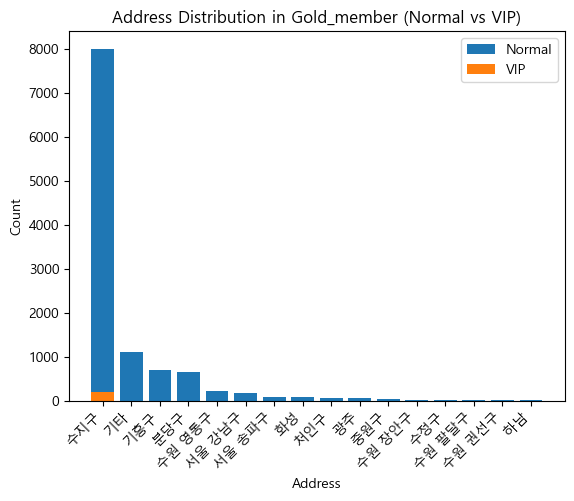

In [71]:
# normal과 VIP 그룹의 주소 분포 계산
normal_address_counts = final_member[final_member['Gold_member'] == 'normal']['주소_구'].value_counts()
vip_address_counts = final_member[final_member['Gold_member'] == 'VIP']['주소_구'].value_counts()

# 그래프 생성
plt.bar(normal_address_counts.index, normal_address_counts.values, label='Normal')
plt.bar(vip_address_counts.index, vip_address_counts.values, label='VIP')

# x축 라벨 조정
plt.xticks(rotation=45, ha='right')

# 그래프 제목과 축 레이블 설정
plt.title('Address Distribution in Gold_member (Normal vs VIP)')
plt.xlabel('Address')
plt.ylabel('Count')
plt.legend()

# 그래프 출력
plt.show()

In [72]:
# normal과 VIP 그룹의 주소 분포 계산
normal_dong_counts = final_member[final_member['Gold_member'] == 'normal']['주소_동'].value_counts()
vip_dong_counts = final_member[final_member['Gold_member'] == 'VIP']['주소_동'].value_counts()

# normal 그룹 주소 분포 출력
print("Normal 그룹 주소 분포:")
print(normal_dong_counts)

# VIP 그룹 주소 분포 출력
print("VIP 그룹 주소 분포:")
print(vip_dong_counts)

Normal 그룹 주소 분포:
주소_동
풍덕천동    3070
기타      1918
상현동     1580
신봉동     1392
동천동      913
        ... 
남사면        1
복정동        1
이동면        1
위례동        1
율동         1
Name: count, Length: 61, dtype: int64
VIP 그룹 주소 분포:
주소_동
풍덕천동    118
신봉동      30
상현동      21
동천동      12
성복동      12
기타        5
정자동       3
서현동       1
율동        1
영덕동       1
구미동       1
Name: count, dtype: int64


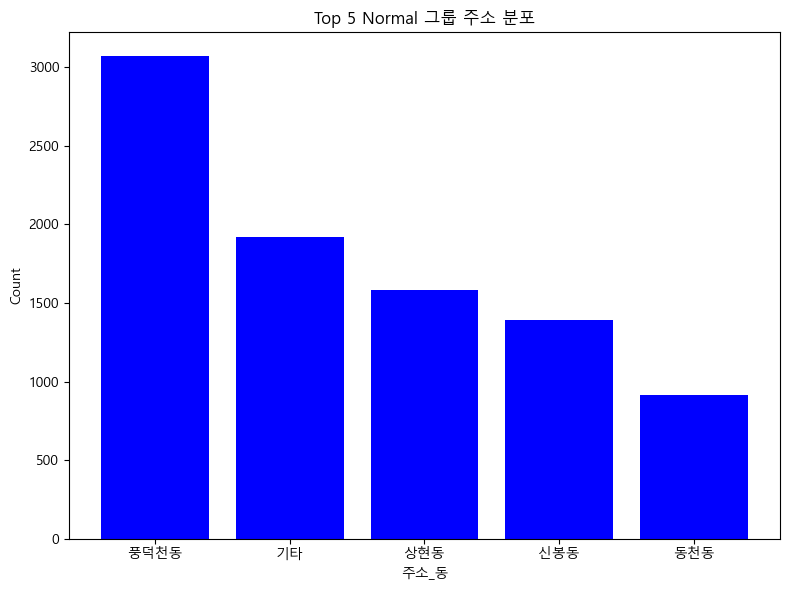

In [73]:
import matplotlib.pyplot as plt

# normal 그룹 주소 분포 상위 5개 추출
top5_normal_dongs = normal_dong_counts.head(5)
top5_normal_labels = top5_normal_dongs.index.tolist()
top5_normal_values = top5_normal_dongs.values.tolist()

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar(top5_normal_labels, top5_normal_values, color='blue')
plt.title('Top 5 Normal 그룹 주소 분포')
plt.xlabel('주소_동')
plt.ylabel('Count')

plt.tight_layout()  # subplot 간의 간격 조정

# 그래프 출력
plt.show()

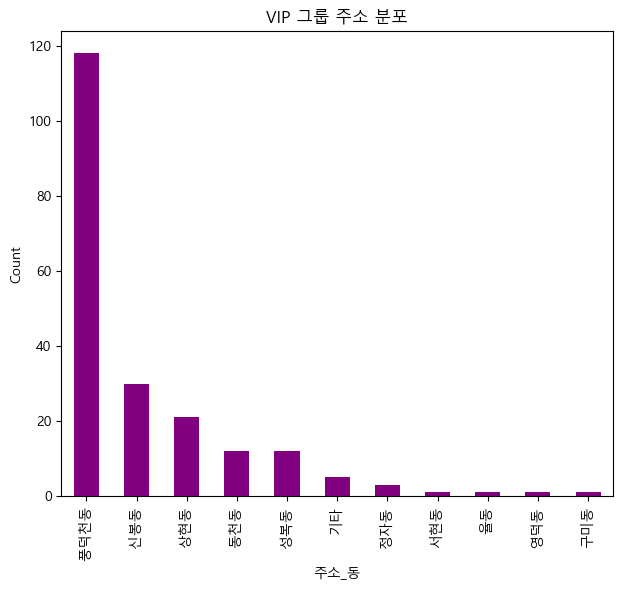

In [74]:
# VIP 그룹의 주소 분포 계산
vip_dong_counts = final_member[final_member['Gold_member'] == 'VIP']['주소_동'].value_counts()

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# VIP 그룹 주소 분포 막대 그래프 그리기
plt.subplot(1, 2, 2)  # 오른쪽 subplot
vip_dong_counts.plot(kind='bar', color='purple')
plt.title('VIP 그룹 주소 분포')
plt.xlabel('주소_동')
plt.ylabel('Count')

plt.tight_layout()  # subplot 간의 간격 조정

# 그래프 출력
plt.show()

In [75]:
# normal과 VIP 그룹의 배송서비스신청여부 분포 계산
normal_delivery_counts = final_member[final_member['Gold_member'] == 'normal']['배송서비스신청여부'].value_counts()
vip_delivery_counts = final_member[final_member['Gold_member'] == 'VIP']['배송서비스신청여부'].value_counts()

# normal 그룹 배송서비스신청여부 분포 출력
print("Normal 그룹 배송서비스신청여부 분포:")
print(normal_delivery_counts)

# VIP 그룹 배송서비스신청여부 분포 출력
print("VIP 그룹 배송서비스신청여부 분포:")
print(vip_delivery_counts)

Normal 그룹 배송서비스신청여부 분포:
배송서비스신청여부
미신청    10304
신청      1043
Name: count, dtype: int64
VIP 그룹 배송서비스신청여부 분포:
배송서비스신청여부
미신청    205
Name: count, dtype: int64


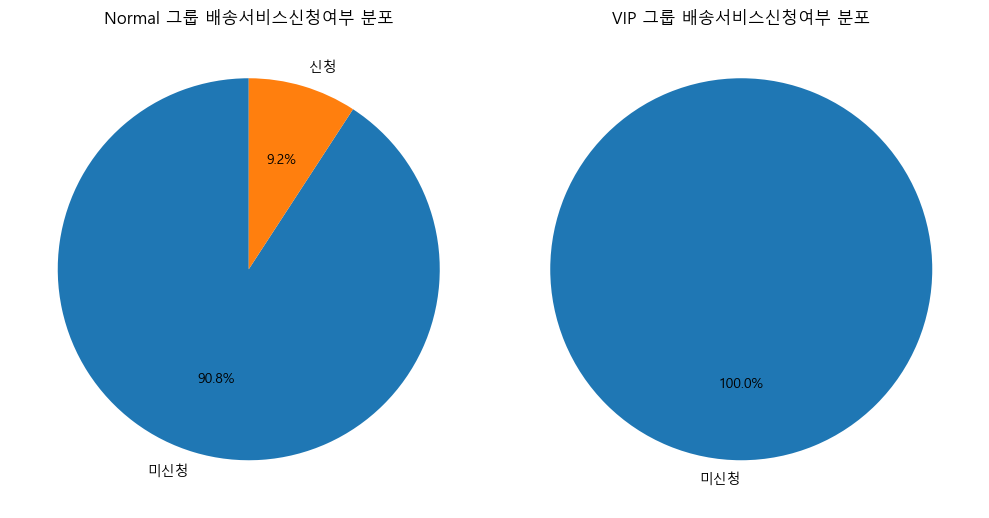

In [76]:
# normal과 VIP 그룹의 배송서비스신청여부 분포 계산
normal_delivery_counts = final_member[final_member['Gold_member'] == 'normal']['배송서비스신청여부'].value_counts()
vip_delivery_counts = final_member[final_member['Gold_member'] == 'VIP']['배송서비스신청여부'].value_counts()

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# normal 그룹 배송서비스신청여부 분포 파이 차트 그리기
plt.subplot(1, 2, 1)  # 왼쪽 subplot
plt.pie(normal_delivery_counts, labels=normal_delivery_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Normal 그룹 배송서비스신청여부 분포')

# VIP 그룹 배송서비스신청여부 분포 파이 차트 그리기
plt.subplot(1, 2, 2)  # 오른쪽 subplot
plt.pie(vip_delivery_counts, labels=vip_delivery_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('VIP 그룹 배송서비스신청여부 분포')

plt.tight_layout()  # subplot 간의 간격 조정

# 그래프 출력
plt.show()

#### Bronze, Silver, Gold, VIP 그룹의 주소 분포 계산

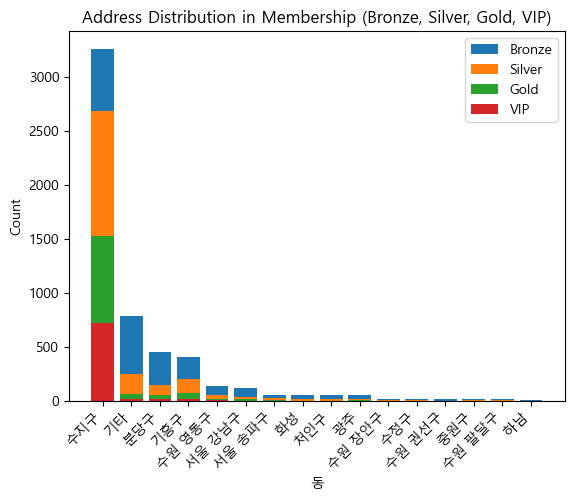

In [77]:
# Bronze, Silver, Gold, VIP 회원 분포 계산
bronze_dong_counts = final_member[final_member['membership'] == 'Bronze']['주소_구'].value_counts()
silver_dong_counts = final_member[final_member['membership'] == 'Silver']['주소_구'].value_counts()
gold_dong_counts = final_member[final_member['membership'] == 'Gold']['주소_구'].value_counts()
vip_dong_counts = final_member[final_member['membership'] == 'VIP']['주소_구'].value_counts()

# 그래프 생성
plt.bar(bronze_dong_counts.index, bronze_dong_counts.values, label='Bronze')
plt.bar(silver_dong_counts.index, silver_dong_counts.values, label='Silver')
plt.bar(gold_dong_counts.index, gold_dong_counts.values, label='Gold')
plt.bar(vip_dong_counts.index, vip_dong_counts.values, label='VIP')

# x축 라벨 조정
plt.xticks(rotation=45, ha='right')

# 그래프 제목과 축 레이블 설정
plt.title('Address Distribution in Membership (Bronze, Silver, Gold, VIP)')
plt.xlabel('동')
plt.ylabel('Count')
plt.legend()

# 그래프 출력
plt.show()

In [78]:
# Bronze, Silver, Gold, VIP 회원 분포 계산
bronze_dong_counts = final_member[final_member['membership'] == 'Bronze']['주소_동'].value_counts()
silver_dong_counts = final_member[final_member['membership'] == 'Silver']['주소_동'].value_counts()
gold_dong_counts = final_member[final_member['membership'] == 'Gold']['주소_동'].value_counts()
vip_dong_counts = final_member[final_member['membership'] == 'VIP']['주소_동'].value_counts()

# 각 등급별로 가장 많은 분포를 보이는 주소_동 추출
bronze_most_common_dong = bronze_dong_counts.idxmax()
silver_most_common_dong = silver_dong_counts.idxmax()
gold_most_common_dong = gold_dong_counts.idxmax()
vip_most_common_dong = vip_dong_counts.idxmax()

# 결과 출력
print("Bronze 가장 많은 분포를 보이는 주소_동:", bronze_most_common_dong)
print("Silver 가장 많은 분포를 보이는 주소_동:", silver_most_common_dong)
print("Gold 가장 많은 분포를 보이는 주소_동:", gold_most_common_dong)
print("VIP 가장 많은 분포를 보이는 주소_동:", vip_most_common_dong)

Bronze 가장 많은 분포를 보이는 주소_동: 기타
Silver 가장 많은 분포를 보이는 주소_동: 풍덕천동
Gold 가장 많은 분포를 보이는 주소_동: 풍덕천동
VIP 가장 많은 분포를 보이는 주소_동: 풍덕천동


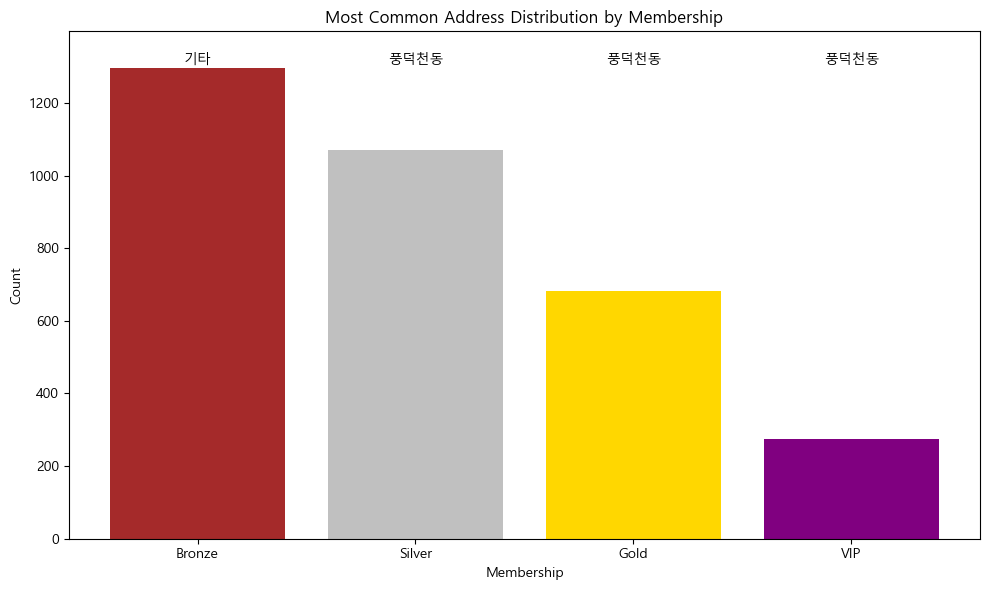

In [79]:
# 각 등급별로 가장 많은 분포를 보이는 주소_동 추출
bronze_most_common_dong = bronze_dong_counts.idxmax()
silver_most_common_dong = silver_dong_counts.idxmax()
gold_most_common_dong = gold_dong_counts.idxmax()
vip_most_common_dong = vip_dong_counts.idxmax()

# 가장 많은 분포를 보이는 주소_동을 리스트로 저장
most_common_dongs = [bronze_most_common_dong, silver_most_common_dong, gold_most_common_dong, vip_most_common_dong]

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(['Bronze', 'Silver', 'Gold', 'VIP'], [bronze_dong_counts[bronze_most_common_dong], silver_dong_counts[silver_most_common_dong], gold_dong_counts[gold_most_common_dong], vip_dong_counts[vip_most_common_dong]], color=['brown', 'silver', 'gold', 'purple'])
plt.title('Most Common Address Distribution by Membership')
plt.xlabel('Membership')
plt.ylabel('Count')
plt.ylim(0, max(bronze_dong_counts.max(), silver_dong_counts.max(), gold_dong_counts.max(), vip_dong_counts.max()) + 100)  # Y 축 범위 설정

# 가장 많은 분포를 보이는 주소_동 표시
for i in range(len(most_common_dongs)):
    plt.text(i, bronze_dong_counts[bronze_most_common_dong] + 10, most_common_dongs[i], ha='center')

plt.tight_layout()  # subplot 간의 간격 조정

# 그래프 출력
plt.show()

In [80]:
# Bronze, Silver, Gold, VIP 그룹의 배송서비스신청여부 분포 계산
bronze_delivery_counts = final_member[final_member['membership'] == 'Bronze']['배송서비스신청여부'].value_counts()
silver_delivery_counts = final_member[final_member['membership'] == 'Silver']['배송서비스신청여부'].value_counts()
gold_delivery_counts = final_member[final_member['membership'] == 'Gold']['배송서비스신청여부'].value_counts()
vip_delivery_counts = final_member[final_member['membership'] == 'VIP']['배송서비스신청여부'].value_counts()

# Bronze 그룹 배송서비스신청여부 분포 출력
print("Bronze 그룹 배송서비스신청여부 분포:")
print(bronze_delivery_counts)

# Silver 그룹 배송서비스신청여부 분포 출력
print("Silver 그룹 배송서비스신청여부 분포:")
print(silver_delivery_counts)

# Gold 그룹 배송서비스신청여부 분포 출력
print("Gold 그룹 배송서비스신청여부 분포:")
print(gold_delivery_counts)

# VIP 그룹 배송서비스신청여부 분포 출력
print("VIP 그룹 배송서비스신청여부 분포:")
print(vip_delivery_counts)

Bronze 그룹 배송서비스신청여부 분포:
배송서비스신청여부
미신청    5436
신청       50
Name: count, dtype: int64
Silver 그룹 배송서비스신청여부 분포:
배송서비스신청여부
미신청    3246
신청      234
Name: count, dtype: int64
Gold 그룹 배송서비스신청여부 분포:
배송서비스신청여부
미신청    1086
신청      679
Name: count, dtype: int64
VIP 그룹 배송서비스신청여부 분포:
배송서비스신청여부
미신청    706
신청      80
Name: count, dtype: int64


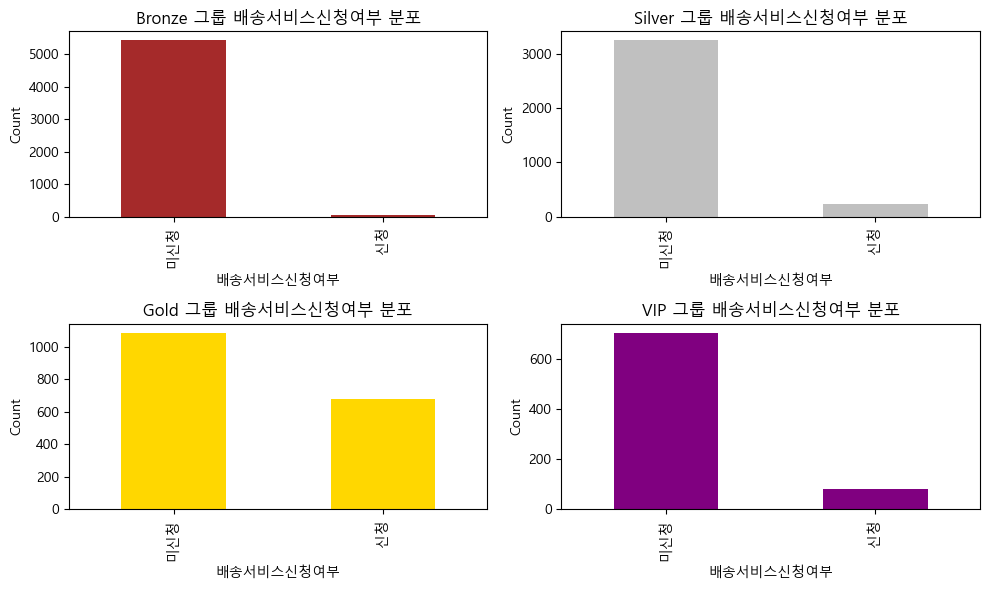

In [82]:
# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 각 그룹의 배송서비스신청여부 분포 막대 그래프 그리기
plt.subplot(2, 2, 1)  # 상단 왼쪽 subplot
bronze_delivery_counts.plot(kind='bar', color='brown')
plt.title('Bronze 그룹 배송서비스신청여부 분포')
plt.xlabel('배송서비스신청여부')
plt.ylabel('Count')

plt.subplot(2, 2, 2)  # 상단 오른쪽 subplot
silver_delivery_counts.plot(kind='bar', color='silver')
plt.title('Silver 그룹 배송서비스신청여부 분포')
plt.xlabel('배송서비스신청여부')
plt.ylabel('Count')

plt.subplot(2, 2, 3)  # 하단 왼쪽 subplot
gold_delivery_counts.plot(kind='bar', color='gold')
plt.title('Gold 그룹 배송서비스신청여부 분포')
plt.xlabel('배송서비스신청여부')
plt.ylabel('Count')

plt.subplot(2, 2, 4)  # 하단 오른쪽 subplot
vip_delivery_counts.plot(kind='bar', color='purple')
plt.title('VIP 그룹 배송서비스신청여부 분포')
plt.xlabel('배송서비스신청여부')
plt.ylabel('Count')

plt.tight_layout()  # subplot 간의 간격 조정

# 그래프 출력
plt.show()

## 판매데이터와 고객데이터의 join


In [55]:
merged_df = pd.merge(product, final_member, on=['회원번호', '조합원상태'], how='inner')
merged_df # 결과 확인

,공급일자_,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,연령층,주소_구,주소_동,membership
0,2021-01-01,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207,매장C,...,여,45.0,미신청,수신,VIP,40대,중년층,수지구,풍덕천동,VIP
1,2021-01-01,272369856,정상회원,간식,떡,가래떡,떡국떡(유기:800g),1.0,11295,매장C,...,여,45.0,미신청,수신,VIP,40대,중년층,수지구,풍덕천동,VIP
2,2021-01-01,272369856,정상회원,채소,뿌리채소,우엉/손질,우엉채(200g),1.0,5169,매장C,...,여,45.0,미신청,수신,VIP,40대,중년층,수지구,풍덕천동,VIP
3,2021-01-01,272369856,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083,매장C,...,여,45.0,미신청,수신,VIP,40대,중년층,수지구,풍덕천동,VIP
4,2021-01-01,272369856,정상회원,반찬,절임/장아찌,절임,단무지(김밥용:400g),1.0,4977,매장C,...,여,45.0,미신청,수신,VIP,40대,중년층,수지구,풍덕천동,VIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294611,2021-10-28,135862912,정상회원,수산,수산가공,젓갈/액젓,멸치액젓(2.1kg),2.0,36374,매장A,...,여,72.0,미신청,.,normal,70대 이상,노년층,수지구,동천동,Silver
294612,2021-10-28,1644557056,정상회원,양념/가루,가루,양념가루,메주가루(500g),1.0,21059,매장A,...,여,63.0,미신청,.,normal,60대,장년층,수지구,동천동,Silver
294613,2021-10-29,1644557056,정상회원,채소,양념채소,생강,생강(300g),1.0,6892,매장A,...,여,63.0,미신청,.,normal,60대,장년층,수지구,동천동,Silver
294614,2021-10-30,959130688,정상회원,간식,빵,"찐빵,호떡,전통",단호박찐빵(300g/5개)/매장,1.0,8232,매장A,...,여,42.0,미신청,.,normal,40대,중년층,수지구,기타,Silver


In [56]:
merged_df.isna().sum()

공급일자_               0
회원번호                0
조합원상태               0
물품대분류               0
물품중분류               0
물품소분류               0
물품명                 0
구매수량                0
구매금액                0
구매매장                0
반품_원거래일자       289665
구매시각                0
weekday             0
구매시간대               0
판매시간대               0
행사품목                0
증정품여부               0
유기농물품               0
성별                  0
연령                  0
배송서비스신청여부           0
모바일알람여부             0
Gold_member         0
연령대                 0
연령층                 0
주소_구                0
주소_동                0
membership         40
dtype: int64

In [57]:
# 반품데이터 df
returned = merged_df[-merged_df['반품_원거래일자'].isnull()]
returned

,공급일자_,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,연령층,주소_구,주소_동,membership
43,2021-03-23,272369856,정상회원,채소,뿌리채소,연근,통연근(400g),-1.0,-7179,매장C,...,여,45.0,미신청,수신,VIP,40대,중년층,수지구,풍덕천동,VIP
271,2021-05-03,176912064,정상회원,채소,열매채소,오이,오이(3개),-3.0,-11199,매장A,...,여,69.0,미신청,.,VIP,60대,노년층,수지구,풍덕천동,VIP
280,2021-05-27,176912064,정상회원,채소,과일채소,완숙토마토,흑토마토(1kg),-1.0,-12444,매장A,...,여,69.0,미신청,.,VIP,60대,노년층,수지구,풍덕천동,VIP
328,2021-10-03,176912064,정상회원,음료,차,잎꽃차,첫물차(30g),-1.0,-51689,매장A,...,여,69.0,미신청,.,VIP,60대,노년층,수지구,풍덕천동,VIP
329,2021-10-03,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),-1.0,-7849,매장A,...,여,69.0,미신청,.,VIP,60대,노년층,수지구,풍덕천동,VIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294486,2021-10-03,524733888,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,-1.0,-4403,매장A,...,남,77.0,미신청,.,normal,70대 이상,노년층,서울 강남구,기타,Silver
294492,2021-10-28,1352610112,정상회원,생활용품,섬유,성인,오가닉코튼 라운드넥 반소매 티셔츠(XL/회색/남성),-1.0,-29482,매장A,...,남,36.0,미신청,.,normal,30대,중년층,수지구,동천동,Silver
294606,2021-10-28,135862912,정상회원,수산,수산가공,젓갈/액젓,황석어젓(1.8kg/1되),-1.0,-29482,매장A,...,여,72.0,미신청,.,normal,70대 이상,노년층,수지구,동천동,Silver
294607,2021-10-28,135862912,정상회원,수산,수산가공,젓갈/액젓,멸치액젓(2.1kg),-2.0,-36374,매장A,...,여,72.0,미신청,.,normal,70대 이상,노년층,수지구,동천동,Silver


In [58]:
normal = merged_df[(merged_df['반품_원거래일자'].isna()) & (merged_df['구매수량'] > 0)]
normal

,공급일자_,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,연령층,주소_구,주소_동,membership
0,2021-01-01,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207,매장C,...,여,45.0,미신청,수신,VIP,40대,중년층,수지구,풍덕천동,VIP
1,2021-01-01,272369856,정상회원,간식,떡,가래떡,떡국떡(유기:800g),1.0,11295,매장C,...,여,45.0,미신청,수신,VIP,40대,중년층,수지구,풍덕천동,VIP
2,2021-01-01,272369856,정상회원,채소,뿌리채소,우엉/손질,우엉채(200g),1.0,5169,매장C,...,여,45.0,미신청,수신,VIP,40대,중년층,수지구,풍덕천동,VIP
3,2021-01-01,272369856,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083,매장C,...,여,45.0,미신청,수신,VIP,40대,중년층,수지구,풍덕천동,VIP
4,2021-01-01,272369856,정상회원,반찬,절임/장아찌,절임,단무지(김밥용:400g),1.0,4977,매장C,...,여,45.0,미신청,수신,VIP,40대,중년층,수지구,풍덕천동,VIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294611,2021-10-28,135862912,정상회원,수산,수산가공,젓갈/액젓,멸치액젓(2.1kg),2.0,36374,매장A,...,여,72.0,미신청,.,normal,70대 이상,노년층,수지구,동천동,Silver
294612,2021-10-28,1644557056,정상회원,양념/가루,가루,양념가루,메주가루(500g),1.0,21059,매장A,...,여,63.0,미신청,.,normal,60대,장년층,수지구,동천동,Silver
294613,2021-10-29,1644557056,정상회원,채소,양념채소,생강,생강(300g),1.0,6892,매장A,...,여,63.0,미신청,.,normal,60대,장년층,수지구,동천동,Silver
294614,2021-10-30,959130688,정상회원,간식,빵,"찐빵,호떡,전통",단호박찐빵(300g/5개)/매장,1.0,8232,매장A,...,여,42.0,미신청,.,normal,40대,중년층,수지구,기타,Silver
